# 1. Using a Tagger

In [1]:
import nltk
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

Here we see that and is CC, a coordinating conjunction; now and completely are RB, or adverbs; for is IN, a preposition; something is NN, a noun; and different is JJ, an adjective.

**Note-:** NLTK provides documentation for each tag, which can be queried using the tag, e.g. nltk.help.upenn_tagset('RB'), or a regular expression, e.g. nltk.help.upenn_tagset('NN.*'). Some corpora have README files with tagset documentation, see nltk.corpus.???.readme(), substituting in the name of the corpus.

Let's look at another example, this time including some homonyms:

In [2]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

Notice that refuse and permit both appear as a present tense verb (VBP) and a noun (NN). E.g. refUSE is a verb meaning "deny," while REFuse is a noun meaning "trash" (i.e. they are not homophones). Thus, we need to know which word is being used in order to pronounce the text correctly. (For this reason, text-to-speech systems usually perform POS-tagging.)

**Note-:** Your Turn: Many words, like ski and race, can be used as nouns or verbs with no difference in pronunciation. Can you think of others? Hint: think of a commonplace object and try to put the word to before it to see if it can also be a verb, or think of an action and try to put the before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS-tagger on this sentence.

In [3]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world family house country child boy
state job way war girl place word work


In [4]:
text.similar('bought')

made said put done seen had found left given heard brought got been
was set told took in felt that


In [5]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [6]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


Observe that searching for woman finds nouns; searching for bought mostly finds verbs; searching for over generally finds prepositions; searching for the finds several determiners. A tagger can correctly identify the tags on these words in the context of a sentence, e.g. The woman bought over $150,000 worth of clothes.

A tagger can also model our knowledge of unknown words, e.g. we can guess that scrobbling is probably a verb, with the root scrobble, and likely to occur in contexts like he was scrobbling.

# 2. Tagged Corpora

## 2.1   Representing Tagged Tokens 

By convention in NLTK, a tagged token is represented using a tuple consisting of the token and the tag. We can create one of these special tuples from the standard string representation of a tagged token, using the function str2tuple():

In [7]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [8]:
tagged_token[0]

'fly'

In [9]:
tagged_token[1]

'NN'

We can construct a list of tagged tokens directly from a string. The first step is to tokenize the string to access the individual word/tag strings, and then to convert each of these into a tuple (using str2tuple()).

In [10]:
sent = "Doing the assignment of NLP is fun. This is the assignment on POS tagging"
[nltk.tag.str2tuple(t) for t in sent.split()]

[('Doing', None),
 ('the', None),
 ('assignment', None),
 ('of', None),
 ('NLP', None),
 ('is', None),
 ('fun.', None),
 ('This', None),
 ('is', None),
 ('the', None),
 ('assignment', None),
 ('on', None),
 ('POS', None),
 ('tagging', None)]

## 2.1   Reading Tagged Corpora

Several of the corpora included with NLTK have been tagged for their part-of-speech. Here's an example of what you might see if you opened a file from the Brown Corpus with a text editor:

The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd / no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.

Other corpora use a variety of formats for storing part-of-speech tags. NLTK's corpus readers provide a uniform interface so that you don't have to be concerned with the different file formats. In contrast with the file fragment shown above, the corpus reader for the Brown Corpus represents the data as shown below. Note that part-of-speech tags have been converted to uppercase, since this has become standard practice since the Brown Corpus was published.

In [11]:
nltk.corpus.brown.tagged_words()

[(u'The', u'AT'), (u'Fulton', u'NP-TL'), ...]

In [12]:
nltk.corpus.brown.tagged_words(tagset='universal')

[(u'The', u'DET'), (u'Fulton', u'NOUN'), ...]

Whenever a corpus contains tagged text, the NLTK corpus interface will have a tagged_words() method. Here are some more examples, again using the output format illustrated for the Brown Corpus:

In [14]:
nltk.corpus.conll2000.tagged_words()

[(u'Confidence', u'NN'), (u'in', u'IN'), ...]

In [15]:
nltk.corpus.treebank.tagged_words()

[(u'Pierre', u'NNP'), (u'Vinken', u'NNP'), ...]

Not all corpora employ the same set of tags; see the tagset help functionality and the readme() methods mentioned above for documentation. Initially we want to avoid the complications of these tagsets, so we use a built-in mapping to the "Universal Tagset"

In [17]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[(u'Pierre', u'NOUN'), (u'Vinken', u'NOUN'), ...]

Tagged corpora for several other languages are distributed with NLTK, including Chinese, Hindi, Portuguese, Spanish, Dutch and Catalan. These usually contain non-ASCII text, and Python always displays this in hexadecimal when printing a larger structure such as a list. 

TO check more tagged corpora, type `nltk.download()` and browse through the corpora section

# Hidden Markov Models in python

Here we'll show how the Viterbi algorithm works for HMMs, assuming we have a trained model to start with. Further down we look at the forward and backward algorithms and Baum-Welch.

In [32]:
import numpy as np

Initialise the model parameters based on the example from the lecture slides<br>
http://people.eng.unimelb.edu.au/tcohn/comp90042/l15.ppt

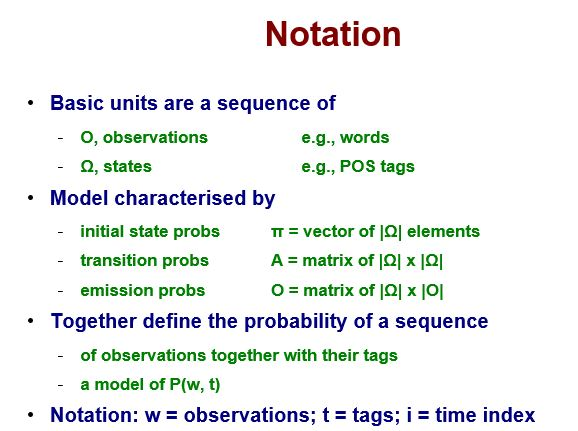

In [58]:
Image(filename='Data/parameters.JPG')

In [33]:
A = np.array([[0.6, 0.2, 0.2], [0.5, 0.3, 0.2], [0.4, 0.1, 0.5]])
pi = np.array([0.5, 0.2, 0.3])
O = np.array([[0.7, 0.1, 0.2], [0.1, 0.6, 0.3], [0.3, 0.3, 0.4]])

Now let's consider the example observation sequence UP, UP, DOWN, for which we'll try to discover the hidden state sequence.

In [34]:
states = UP, DOWN, UNCHANGED = 0, 1, 2
observations = [UP, UP, DOWN]

Now we'll code the Viterbi algorithm. It keeps a store of two components, the best scores to reach a state at a give time, and the last step of the path to get there. Scores alpha are initialised to -inf to denote that we haven't set them yet. 

In [35]:
alpha = np.zeros((len(observations), len(states))) # time steps x states
alpha[:,:] = float('-inf')
backpointers = np.zeros((len(observations), len(states)), 'int')

The base case for the recursion sets the starting state probs based on pi and generating the observation.

In [36]:
# base case, time step 0
alpha[0, :] = pi * O[:,UP]
alpha

array([[ 0.35,  0.02,  0.09],
       [ -inf,  -inf,  -inf],
       [ -inf,  -inf,  -inf]])

Now for the recursive step, where we maximise over incoming transitions reusing the best incoming score, computed above.

In [37]:
# time step 1
for t1 in states:
    for t0 in states:
        score = alpha[0, t0] * A[t0, t1] * O[t1,UP]
        if score > alpha[1, t1]:
            alpha[1, t1] = score
            backpointers[1, t1] = t0
alpha

array([[ 0.35 ,  0.02 ,  0.09 ],
       [ 0.147,  0.007,  0.021],
       [  -inf,   -inf,   -inf]])

Repeat with the next observation. (We'd do this as a loop in practice.)

In [38]:
# time step 2
for t2 in states:
    for t1 in states:
        score = alpha[1, t1] * A[t1, t2] * O[t2,DOWN]
        if score > alpha[2, t2]:
            alpha[2, t2] = score
            backpointers[2, t2] = t1
alpha

array([[ 0.35   ,  0.02   ,  0.09   ],
       [ 0.147  ,  0.007  ,  0.021  ],
       [ 0.00882,  0.01764,  0.00882]])

Now read of the best final state, and follow the backpointers to recover the full path.

In [39]:
np.argmax(alpha[2,:])

1

In [40]:
backpointers[2,1]

0

In [41]:
backpointers[1,0]

0

Phew. The best state sequence is [0, 0, 1]

## Formalising things

Now we can put this all into a function to handle arbitrary length inputs 

In [42]:
def viterbi(params, observations):
    pi, A, O = params
    M = len(observations)
    S = pi.shape[0]
    
    alpha = np.zeros((M, S))
    alpha[:,:] = float('-inf')
    backpointers = np.zeros((M, S), 'int')
    
    # base case
    alpha[0, :] = pi * O[:,observations[0]]
    
    # recursive case
    for t in range(1, M):
        for s2 in range(S):
            for s1 in range(S):
                score = alpha[t-1, s1] * A[s1, s2] * O[s2, observations[t]]
                if score > alpha[t, s2]:
                    alpha[t, s2] = score
                    backpointers[t, s2] = s1
    
    # now follow backpointers to resolve the state sequence
    ss = []
    ss.append(np.argmax(alpha[M-1,:]))
    for i in range(M-1, 0, -1):
        ss.append(backpointers[i, ss[-1]])
        
    return list(reversed(ss)), np.max(alpha[M-1,:])

In [43]:
viterbi((pi, A, O), [UP, UP, DOWN])

([0, 0, 1], 0.017639999999999999)

In [44]:
viterbi((pi, A, O), [UP, UP, DOWN, UNCHANGED, UNCHANGED, DOWN, UP, UP])

([0, 0, 2, 2, 2, 2, 0, 0], 6.2233919999999994e-06)

## Exhaustive method

Let's verify that we've done the above algorithm correctly by implementing exhaustive search.

In [45]:
from itertools import product

def exhaustive(params, observations):
    pi, A, O = params
    M = len(observations)
    S = pi.shape[0]
    
    # track the running best sequence and its score
    best = (None, float('-inf'))
    # loop over the cartesian product of |states|^M
    for ss in product(range(S), repeat=M):
        # score the state sequence
        score = pi[ss[0]] * O[ss[0],observations[0]]
        for i in range(1, M):
            score *= A[ss[i-1], ss[i]] * O[ss[i], observations[i]]
        # update the running best
        if score > best[1]:
            best = (ss, score)
            
    return best

In [46]:
exhaustive((pi, A, O), [UP, UP, DOWN])

((0, 0, 1), 0.017639999999999999)

In [47]:
exhaustive((pi, A, O), [UP, UP, DOWN, UNCHANGED, UNCHANGED, DOWN, UP, UP])

((0, 0, 2, 2, 2, 2, 0, 0), 6.2233919999999994e-06)

Yay, it got the same results as before. Note that the exhaustive method is practical on anything beyond toy data due to the nasty cartesian product. But it is worth doing to verify the Viterbi code above is getting the right results. 

## Supervised training, aka "visible" Markov model

Let's train the HMM parameters on the Penn Treebank, using the sample from NLTK. Note that this is a small fraction of the treebank, so we shouldn't expect great performance of our method trained only on this data.

In [48]:
from nltk.corpus import treebank

In [49]:
corpus = treebank.tagged_sents()
print corpus

[[(u'Pierre', u'NNP'), (u'Vinken', u'NNP'), (u',', u','), (u'61', u'CD'), (u'years', u'NNS'), (u'old', u'JJ'), (u',', u','), (u'will', u'MD'), (u'join', u'VB'), (u'the', u'DT'), (u'board', u'NN'), (u'as', u'IN'), (u'a', u'DT'), (u'nonexecutive', u'JJ'), (u'director', u'NN'), (u'Nov.', u'NNP'), (u'29', u'CD'), (u'.', u'.')], [(u'Mr.', u'NNP'), (u'Vinken', u'NNP'), (u'is', u'VBZ'), (u'chairman', u'NN'), (u'of', u'IN'), (u'Elsevier', u'NNP'), (u'N.V.', u'NNP'), (u',', u','), (u'the', u'DT'), (u'Dutch', u'NNP'), (u'publishing', u'VBG'), (u'group', u'NN'), (u'.', u'.')], ...]


In [50]:
news_text = nltk.corpus.brown.words(categories='news')

In [51]:
brownSent = ""
for word in news_text[0:20]:
    brownSent = brownSent + str(word)
    brownSent = brownSent + " "

We have to first map words and tags to numbers for compatibility with the above methods.

In [52]:
from datetime import datetime
start1 = datetime.now()

word_numbers = {}
tag_numbers = {}

num_corpus = []
for sent in corpus:
    num_sent = []
    for word, tag in sent:
        wi = word_numbers.setdefault(word.lower(), len(word_numbers))
        ti = tag_numbers.setdefault(tag, len(tag_numbers))
        num_sent.append((wi, ti))
    num_corpus.append(num_sent)
    
word_names = [None] * len(word_numbers)
for word, index in word_numbers.items():
    word_names[index] = word
tag_names = [None] * len(tag_numbers)
for tag, index in tag_numbers.items():
    tag_names[index] = tag
#Now let's hold out the last few sentences for testing, so that they are unseen 
#during training and give a more reasonable estimate of accuracy on fresh text.

training = num_corpus[:-10]
testing = num_corpus[-10:]

#Next we compute relative frequency estimates based on the observed tag
#and word counts in the training set. Note that smoothing is important, here we add a small constant to all counts. 

S = len(tag_numbers)
V = len(word_numbers)

# initalise
eps = 0.1
pi = eps * np.ones(S)
A = eps * np.ones((S, S))
O = eps * np.ones((S, V))

# count
for sent in training:
    last_tag = None
    for word, tag in sent:
        O[tag, word] += 1
        if last_tag != None:
            pi[tag] += 1
        else:
            A[last_tag, tag] += 1
        last_tag = tag
        
# normalise
pi /= np.sum(pi)
for s in range(S):
    O[s,:] /= np.sum(O[s,:])
    A[s,:] /= np.sum(A[s,:])
#Now we're ready to use our Viterbi method defined above

predicted, score = viterbi((pi, A, O), map(lambda (w,t): w, testing[0]))
print datetime.now()-start1

0:00:02.033333


In [53]:
print '%20s\t%5s\t%5s' % ('TOKEN', 'TRUE', 'PRED')
for (wi, ti), pi in zip(testing[0], predicted):
    print '%20s\t%5s\t%5s' % (word_names[wi], tag_names[ti], tag_names[pi])

               TOKEN	 TRUE	 PRED
                   a	   DT	   DT
               white	  NNP	  NNP
               house	  NNP	  NNP
           spokesman	   NN	   NN
                said	  VBD	  VBD
                last	   JJ	   JJ
                week	   NN	   NN
                that	   IN	  WDT
                 the	   DT	   DT
           president	   NN	   NN
                  is	  VBZ	  VBZ
         considering	  VBG	  VBG
                 *-1	-NONE-	-NONE-
           declaring	  VBG	  VBG
                that	   IN	  WDT
                 the	   DT	   DT
        constitution	  NNP	  NNP
          implicitly	   RB	  SYM
               gives	  VBZ	  VBZ
                 him	  PRP	  PRP
                 the	   DT	   DT
           authority	   NN	   NN
                 for	   IN	   IN
                   a	   DT	   DT
           line-item	   JJ	   JJ
                veto	   NN	   VB
                 *-2	-NONE-	-NONE-
                  to	   TO	   TO
             provoke	   VB	   VB
      

Hey, not bad, only three errors. Can you explain why these might have occurred?

## Marginalisation in Hidden Markov Models

A related problem is marginalisation, when we wish to find the probability of an observation sequence *under any hidden state sequence*. This allows hidden Markov models to function as language models, but also is key to unsupervised training and the central algorithm for training.

As with the Viterbi algorithm, we'll need to start with the mathematical definition and attempt to factorise it (to follow a recursion, thus allowing for dynamic programming). The quantity we wish to compute is $$p(\vec{w}) = \sum_{\vec{t}} p(\vec{t}, \vec{w})$$
where $w$ are the observations (words) and $t$ are the states (tags).

Let's start by expanding the summation 
$$
p(\vec{w})  = \sum_{t_1} \sum_{t_2} \cdots \sum_{t_{N-1}} \sum_{t_N} p(\vec{t}, \vec{w})
$$
and expand the HMM probability 
$$
p(\vec{w})  = \sum_{t_1} \sum_{t_2} \cdots \sum_{t_{N-1}} \sum_{t_N} p(t_1) p(w_1 | t_1) p(t_2 | t_1) p(w_2| t_2) \cdots p(t_{N-1} | t_{N-2}) p(w_{N-1}| t_{N-1}) p(t_{N} | t_{N-1}) p(w_{N}| t_{N})
$$

Let's compare the full marginal probability $p(\vec{w})$ and the probability up to position $N-1$, finishing with tag $t_{N-1}$
$$p(w_1, w_2, \ldots, w_{N-1}, t_{N-1}) = \sum_{t_1} \sum_{t_2} \cdots \sum_{t_{N-1}} p(t_1) p(w_1 | t_1) p(t_2 | t_1) p(w_2| t_2) \cdots p(t_{N-1} | t_{N-2}) p(w_{N-1}| t_{N-1})
$$

They look rather similar, and in fact we can express $p(\vec{w})$ more simply as
$$
p(\vec{w})  = \sum_{t_N} p(w_1, w_2, \ldots, w_{N-1}, t_{N-1}) p(t_{N} | t_{N-1}) p(w_{N}| t_{N})
$$

We can continue further by defining $p(w_1, w_2, \ldots, w_{N-1}, t_{N-1})$ in terms of $p(w_1, w_2, \ldots, w_{N-2}, t_{N-2})$ and so forth. (This is the same process used in the Viterbi algorithm, albeit swapping a max for a sum.)

Formally we store a matrix of partial marginals, $\alpha$ defined as follows
$$\alpha[i, t_i] = p(w_1, w_2, \ldots, w_i, t_i)$$
computed using the recursion
$$  
\alpha[i, t_i] = \sum_{t_{i-1}} \alpha[i-1, t_i] p(t_i | t_{i-1}) p(w_i| t_i) 
$$
and the base case for $i=1$,
$$
\alpha[1, t_1] = p(t_1) p(w_1 | t_1)
$$

Now we have computed the formulation, we can put this into an iterative algorithm: compute the vector of alpha[1] values, then alpha[2] etc until we reach the end of our input

In [52]:
def forward(params, observations):
    pi, A, O = params
    N = len(observations)
    S = pi.shape[0]
    
    alpha = np.zeros((N, S))
    
    # base case
    alpha[0, :] = pi * O[:,observations[0]]
    
    # recursive case
    for i in range(1, N):
        for s2 in range(S):
            for s1 in range(S):
                alpha[i, s2] += alpha[i-1, s1] * A[s1, s2] * O[s2, observations[i]]
    
    return (alpha, np.sum(alpha[N-1,:]))

In [53]:
A = np.array([[0.6, 0.2, 0.2], [0.5, 0.3, 0.2], [0.4, 0.1, 0.5]])
pi = np.array([0.5, 0.2, 0.3])
O = np.array([[0.7, 0.1, 0.2], [0.1, 0.6, 0.3], [0.3, 0.3, 0.4]])

forward((pi, A, O), [UP, UP, DOWN])

(array([[ 0.35    ,  0.02    ,  0.09    ],
        [ 0.1792  ,  0.0085  ,  0.0357  ],
        [ 0.012605,  0.025176,  0.016617]]), 0.054398000000000002)

In [54]:
forward((pi, A, O), [UP, UP, DOWN, UNCHANGED, UNCHANGED, DOWN, UP, UP])

(array([[  3.50000000e-01,   2.00000000e-02,   9.00000000e-02],
        [  1.79200000e-01,   8.50000000e-03,   3.57000000e-02],
        [  1.26050000e-02,   2.51760000e-02,   1.66170000e-02],
        [  5.35956000e-03,   3.52065000e-03,   6.34588000e-03],
        [  1.50288260e-03,   8.28808500e-04,   1.97959280e-03],
        [  2.10797093e-04,   4.48307010e-04,   4.36840386e-04],
        [  3.67757541e-04,   2.20335560e-05,   1.05072304e-04],
        [  1.91590157e-04,   9.06688053e-06,   3.91483114e-05]]),
 0.00023980534876399999)

Let's confirm we did this correctly by implementing an exhaustive equivalent

In [55]:
def exhaustive_forward(params, observations):
    pi, A, O = params
    N = len(observations)
    S = pi.shape[0]

    total = 0.0
    # loop over the cartesian product of |states|^N
    for ss in product(range(S), repeat=N):
        # score the state sequence
        score = pi[ss[0]] * O[ss[0],observations[0]]
        for i in range(1, N):
            score *= A[ss[i-1], ss[i]] * O[ss[i], observations[i]]
        total += score
            
    return total

In [56]:
exhaustive_forward((pi, A, O), [UP, UP, DOWN])

0.054397999999999988

In [57]:
exhaustive_forward((pi, A, O), [UP, UP, DOWN, UNCHANGED, UNCHANGED, DOWN, UP, UP])

0.00023980534876400081

## Backward algorithm

The same process but working from left to right rather than right to left give us the backward algorithm.

In [58]:
def backward(params, observations):
    pi, A, O = params
    N = len(observations)
    S = pi.shape[0]
    
    beta = np.zeros((N, S))
    
    # base case
    beta[N-1, :] = 1
    
    # recursive case
    for i in range(N-2, -1, -1):
        for s1 in range(S):
            for s2 in range(S):
                beta[i, s1] += beta[i+1, s2] * A[s1, s2] * O[s2, observations[i+1]]
    
    return (beta, np.sum(pi * O[:, observations[0]] * beta[0,:]))

Let's confirm the it gets the same marginal probability as the forward algorithm 

In [59]:
backward((pi, A, O), [UP, UP, DOWN])

(array([[ 0.1216,  0.1077,  0.1076],
        [ 0.24  ,  0.29  ,  0.25  ],
        [ 1.    ,  1.    ,  1.    ]]), 0.054397999999999995)

## Unsupervised training

Unsupervised training of a HMM involves running forward and backward to estimate the *expected* probability of taking various state sequences, then updates the model to match these *expectations*. This repeats many times until things stabilise (covergence). Note that it's non-convex, so the starting point often affects the converged solution.

In [60]:
def baum_welch(training, pi, A, O, iterations):
    pi, A, O = np.copy(pi), np.copy(A), np.copy(O) # take copies, as we modify them
    S = pi.shape[0]
    
    # do several steps of EM hill climbing
    for it in range(iterations):
        pi1 = np.zeros_like(pi)
        A1 = np.zeros_like(A)
        O1 = np.zeros_like(O)
        
        for observations in training:
            # compute forward-backward matrices
            alpha, za = forward((pi, A, O), observations)
            beta, zb = backward((pi, A, O), observations)
            assert abs(za - zb) < 1e-6, "it's badness 10000 if the marginals don't agree"
            
            # M-step here, calculating the frequency of starting state, transitions and (state, obs) pairs
            pi1 += alpha[0,:] * beta[0,:] / za
            for i in range(0, len(observations)):
                O1[:, observations[i]] += alpha[i,:] * beta[i,:] / za
            for i in range(1, len(observations)):
                for s1 in range(S):
                    for s2 in range(S):
                        A1[s1, s2] += alpha[i-1,s1] * A[s1, s2] * O[s2, observations[i]] * beta[i,s2] / za
                                                                    
        # normalise pi1, A1, O1
        pi = pi1 / np.sum(pi1)
        for s in range(S):
            A[s, :] = A1[s, :] / np.sum(A1[s, :])
            O[s, :] = O1[s, :] / np.sum(O1[s, :])
    
    return pi, A, O

Let's test it out by training on our example from above

In [61]:
pi2, A2, O2 = baum_welch([[UP, UP, DOWN]], pi, A, O, 10)

In [62]:
forward((pi2, A2, O2), [UP, UP, DOWN])

(array([[  9.99894603e-01,   8.36665388e-12,   8.22616418e-05],
        [  2.22272332e-01,   3.12183957e-02,   4.43718595e-01],
        [  4.20221660e-07,   4.52046779e-01,   2.00391873e-02]]),
 0.47208638604110348)

Looks like it memorised the sequence, and has assigned it a very high probability. The downside is that it won't be very accepting of other sequences

In [63]:
forward((pi2, A2, O2), [UP, UP, DOWN, UNCHANGED, UNCHANGED, DOWN, UP, UP])

(array([[  9.99894603e-01,   8.36665388e-12,   8.22616418e-05],
        [  2.22272332e-01,   3.12183957e-02,   4.43718595e-01],
        [  4.20221660e-07,   4.52046779e-01,   2.00391873e-02],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]), 0.0)

This looks strangely reminiscent of many other learning problems.... Can you think how we might deal with this?

Incidentally training on both sequences leads to perhaps a better model

In [64]:
pi3, A3, O3 = baum_welch([[UP, UP, DOWN], [UP, UP, DOWN, UNCHANGED, UNCHANGED, DOWN, UP, UP]], pi, A, O, 10)

In [65]:
forward((pi3, A3, O3), [UP, UP, DOWN])

(array([[  9.97616199e-01,   6.82049129e-15,   6.29715798e-14],
        [  5.90761154e-01,   7.47740892e-03,   8.78089899e-06],
        [  8.43266173e-04,   2.34964056e-01,   6.52309204e-04]]),
 0.23645963152993088)

In [66]:
forward((pi3, A3, O3), [UP, UP, DOWN, UNCHANGED, UNCHANGED, DOWN, UP, UP])

(array([[  9.97616199e-01,   6.82049129e-15,   6.29715798e-14],
        [  5.90761154e-01,   7.47740892e-03,   8.78089899e-06],
        [  8.43266173e-04,   2.34964056e-01,   6.52309204e-04],
        [  5.82459529e-09,   2.71931576e-08,   1.19461094e-01],
        [  8.75785986e-10,   1.60469759e-06,   5.79399172e-02],
        [  1.69690262e-05,   1.79695695e-02,   4.16867527e-03],
        [  7.92352114e-03,   2.46221157e-05,   9.62381867e-05],
        [  4.71403139e-03,   5.99516484e-05,   5.81125813e-07]]),
 0.004774564161046658)

## Keeping (making?) in real

This is a toy implementation of a HMM for pedagogical purposes. In reality we use several tricks to make things faster (e.g., matrix-vector operations) and to avoid floating point issues of underflow. These tricks complicate the code a fair bit. See the [Rabiner tutorial](http://www.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/tutorial%20on%20hmm%20and%20applications.pdf) for details, especifically the section about scaling factors. Another trick is to [work in log-space](http://machineintelligence.tumblr.com/post/4998477107/the-log-sum-exp-trick), which is easy for Viterbi but a bit more painful (and slower) for forward-backward.

### Exercises?

 - NLTK, currently has HMM implemeneted. Can you train the HMM with brown corpus with different training sizes:
    - 5000 sentences.
    - 10000 sentences
    - 15000 sentences
    - 20000 sentences
    
 - Plot the difference in accuracy for a set of held out dataset, for training set of varying sizes.
 - Plot the difference in time taken for training with varying sizes of training set

#### Referrences

Trevor Cohn course page-: http://people.eng.unimelb.edu.au/tcohn/comp90042.html

Developer - Pranav Shukla<br>
Email id - pranavdynamic@gmail.com